In [ ]:
import pandas as pd
import string

In [ ]:
transcripts = pd.read_csv('/content/drive/MyDrive/College/College: Junior Semester 2/GameDay/CSV files/cleaned_transcripts.csv')
engagement_metrics = pd.read_csv('https://docs.google.com/spreadsheets/d/11aXMRcm2JB-CWwk2KH12TqSTwlDT4bBUuAB7c5dVIqA/export?format=csv')

engagement_metrics.head()

,brand,Estimated Ad Spend ($),Total Mentions,public_metrics.like_count,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.quote_count,public_metrics.bookmark_count,Total Engagements,Virality Score,Cost Per Engagement ($)
0,Angel Soft,800000000,100,170,163,25,1,4,363,0.275482,2.203857e+06
1,Booking.com,800000000,100,1397,4872,40,1,59,6369,0.015701,1.256084e+05
2,Bosch,800000000,100,247,216,27,4,47,541,0.184843,1.478743e+06
3,Bud Light,100976000000,12622,5698,1186204,5404,77,45,1197428,0.010541,8.432741e+04
4,Budweiser,4392000000,549,20,72818,3,0,0,72841,0.007537,6.029571e+04


In [ ]:
transcripts.head()

,Brand,Transcript,sentiment 1,sentiment 2
0,Angel Soft,Angel Soft interrupts this broadcast to bring ...,Playful,Humorous
1,Booking.com,with hotels and vacation rentals bookingcom ha...,Empowering,Energetic
2,Bosch,you may know me as antonio vas but when i use ...,Playful,Energetic
3,Coors Light,happy Monday what a game last night Monday Mon...,Absurdity,Humorous
4,Bud Light,you want to go fishing tomorrow I got a colono...,Playful,Energetic


In [ ]:
# Ensure that the 'transcript' column is treated as a string
transcripts['Transcript'] = transcripts['Transcript'].astype(str)
angel_transcript = transcripts[transcripts['Brand'] == 'Angel Soft']['Transcript']
word_count = len(angel_transcript.iloc[0].split())


In [ ]:
ad_length = transcripts[['Brand', 'Transcript']].copy()  # Create a new dataframe with 'brand' and 'transcript'
ad_length['ad_length'] = ad_length['Transcript'].apply(lambda x: len(x.split()))  # Get the length of each transcript

ad_length.head()

,Brand,Transcript,ad_length
0,Angel Soft,Angel Soft interrupts this broadcast to bring ...,53
1,Booking.com,with hotels and vacation rentals bookingcom ha...,67
2,Bosch,you may know me as antonio vas but when i use ...,65
3,Coors Light,happy Monday what a game last night Monday Mon...,77
4,Bud Light,you want to go fishing tomorrow I got a colono...,127


In [ ]:
brand_quarters = pd.read_csv('https://docs.google.com/spreadsheets/d/1YgHpNhq_Pd6v_ocn_Si2DDxEmqQqtEAOOhhAOxI1XJI/export?format=csv')



,Brand,Quarter,ad_length
0,Cirkul,First Quarter,30
1,Homes.com,First Quarter,30
2,Meta,First Quarter,30
3,Ritz,First Quarter,30
4,Doritos,First Quarter,30


In [ ]:
merged_df = brand_quarters.merge(
    engagement_metrics, left_on="Brand", right_on="brand", how="inner"
)[["brand", "Quarter", "Total Engagements"]]
merged_df.head()

,brand,Quarter,Total Engagements
0,Cirkul,First Quarter,16417
1,Homes.com,First Quarter,22328045
2,Meta,First Quarter,551084
3,Ritz,First Quarter,38858
4,Doritos,First Quarter,6218566


In [ ]:
grouped_df = merged_df.groupby("Quarter", as_index=False)["Total Engagements"].sum()
grouped_df.head()

,Quarter,Total Engagements
0,First Quarter,29218710
1,Fourth Quarter,115391
2,Half Time,18367011
3,Second Quarter,16122774
4,Third Quarter,45031881


In [ ]:
grouped_df.to_csv("Quarter_engagements.csv", index=True)
from google.colab import files
files.download("Quarter_engagements.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
main_tweets = pd.read_csv("/content/final_dataset_2025_for_release.csv")

<ipython-input-5-75acba32a9ed>:1: DtypeWarning: Columns (32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  main_tweets = pd.read_csv("/content/final_dataset_2025_for_release.csv")


In [ ]:
main_tweets.head()

,created_at,text,conversation_id,reply_settings,edit_history_tweet_ids,lang,referenced_tweets,possibly_sensitive,id,author_id,...,entities.cashtags,location,username,name,brand,geo.place_id,attachments.poll_ids,withheld.country_codes,geo.coordinates.type,geo.coordinates.coordinates
0,2025-02-10T03:16:57.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789225308409951,everyone,['1888789225308409951'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789225308409951,206743570,...,NaN,NaN,juanmelriv,|| •)🇮🇩 Juan P Melo,Dunkin',NaN,NaN,NaN,NaN,NaN
1,2025-02-10T03:16:49.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789188876894329,everyone,['1888789188876894329'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789188876894329,282285390,...,NaN,BIEBERLANDIA♡,Camila110598,Camm♡,Dunkin',NaN,NaN,NaN,NaN,NaN
2,2025-02-10T03:16:48.000Z,THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...,1888789186284503124,everyone,['1888789186284503124'],en,NaN,False,1888789186284503124,246885450,...,NaN,"Monterrey, Nuevo León",SevazCFM,Sebastián,Dunkin',b19e24ce42ccd6aa,NaN,NaN,NaN,NaN
3,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,NaN,False,1888789179074793761,1921582838,...,NaN,"Detroit, MI",Vince_4L,Harvey Dent,Dunkin',NaN,NaN,NaN,NaN,NaN
4,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,NaN,False,1888789179074793761,1921582838,...,NaN,"Detroit, MI",Vince_4L,Harvey Dent,Dunkin',NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create the new DataFrame
tweet_langs = main_tweets['lang'].value_counts().reset_index()

# Rename columns
tweet_langs.columns = ['Language', 'count']

# Display result
tweet_langs['Language']

,Language
0,en
1,qme
2,ja
3,es
4,th
5,pt
6,und
7,qht
8,in
9,ko


In [ ]:
lang_map = {
    "en": "English", "qme": "Unknown/Other", "ja": "Japanese", "es": "Spanish",
    "th": "Thai", "pt": "Portuguese", "und": "Undetermined", "qht": "Unknown/Other",
    "in": "Indonesian", "ko": "Korean", "fr": "French", "zxx": "No Linguistic Content",
    "hi": "Hindi", "et": "Estonian", "it": "Italian", "zh": "Chinese",
    "qam": "Unknown/Other", "tl": "Tagalog", "ar": "Arabic", "de": "German",
    "da": "Danish", "tr": "Turkish", "te": "Telugu", "cy": "Welsh",
    "hu": "Hungarian", "ht": "Haitian Creole", "ca": "Catalan", "nl": "Dutch",
    "no": "Norwegian", "sv": "Swedish", "fi": "Finnish", "art": "Artificial Language",
    "pl": "Polish", "qst": "Unknown/Other", "vi": "Vietnamese", "lt": "Lithuanian",
    "eu": "Basque", "cs": "Czech", "ta": "Tamil", "is": "Icelandic",
    "ro": "Romanian", "el": "Greek", "ne": "Nepali", "fa": "Persian",
    "ru": "Russian", "sl": "Slovenian", "gu": "Gujarati", "lv": "Latvian",
    "mr": "Marathi", "iw": "Hebrew", "bn": "Bengali", "ml": "Malayalam",
    "ps": "Pashto", "ur": "Urdu", "qct": "Unknown/Other"
}

# List of unknown/other codes to remove
unknown_codes = {"qme", "qht", "qam", "qst", "qct", "und", "zxx", "art"}

# Apply the mapping
tweet_langs["Language"] = tweet_langs["Language"].map(lang_map)

# Remove rows where Language was mapped to "Unknown/Other" or similar
tweet_langs = tweet_langs[~tweet_langs["Language"].isin(["Unknown/Other", "Undetermined", "No Linguistic Content"])]

tweet_langs.loc[tweet_langs["Language"] == "English", "count"] = 10000

# Display the filtered DataFrame
print(tweet_langs)



               Language  count
0               English  10000
2              Japanese   3695
3               Spanish   3549
4                  Thai   2210
5            Portuguese   2187
8            Indonesian   1435
9                Korean    579
10               French    360
12                Hindi    246
13             Estonian    239
14              Italian    176
15              Chinese    171
17              Tagalog    145
18               Arabic    138
19               German    138
20               Danish    111
21              Turkish     84
22               Telugu     82
23                Welsh     81
24            Hungarian     64
25       Haitian Creole     62
26              Catalan     56
27                Dutch     31
28            Norwegian     28
29              Swedish     28
30              Finnish     23
31  Artificial Language     23
32               Polish     22
34           Vietnamese     15
35           Lithuanian     13
36               Basque     10
37      

In [ ]:
tweet_langs.to_csv("tweet_languages.csv", index=True)
from google.colab import files
files.download("tweet_languages.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

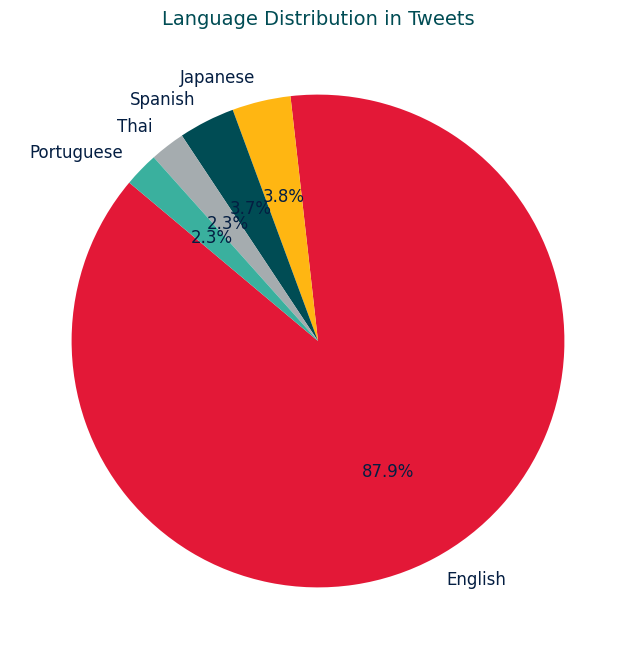

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top languages contributing to 90% of the tweets
tweet_langs_sorted = tweet_langs.sort_values(by="count", ascending=False)
tweet_langs_sorted["percentage"] = tweet_langs_sorted["count"] / tweet_langs_sorted["count"].sum()
tweet_langs_filtered = tweet_langs_sorted[tweet_langs_sorted["percentage"] > 0.02]  # Keep languages >2%

# Colors for pie chart
pie_colors = ["#E31837", "#FFB612", "#004C54", "#A5ACAF", "#3AB09E", "#041E42", "#000000"]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    tweet_langs_filtered["count"],
    labels=tweet_langs_filtered["Language"],
    autopct="%1.1f%%",
    colors=pie_colors,
    startangle=140,
    textprops={"color": "#041E42", "fontsize": 12}
)

# Title
plt.title("Language Distribution in Tweets", fontsize=14, color="#004C54")

# Show plot
plt.show()


<ipython-input-18-a991811cd364>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_langs["count"], y=top_langs["Language"], palette=colors)
<ipython-input-18-a991811cd364>:12: UserWarning: 
The palette list has fewer values (7) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_langs["count"], y=top_langs["Language"], palette=colors)


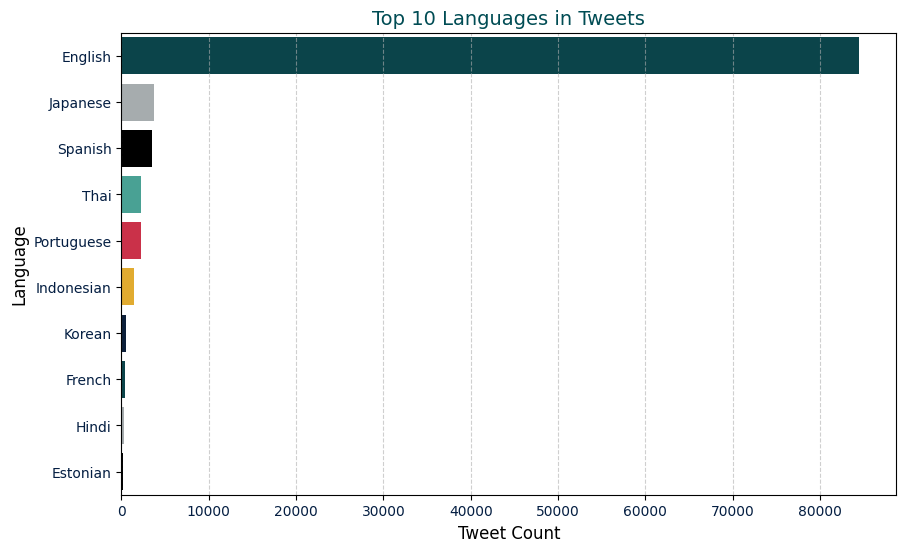

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data by count and take the top 10
top_langs = tweet_langs.sort_values(by="count", ascending=False).head(10)

# Set color palette
colors = ["#004C54", "#A5ACAF", "#000000", "#3AB09E", "#E31837", "#FFB612", "#041E42"]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_langs["count"], y=top_langs["Language"], palette=colors)

# Customize appearance
plt.xlabel("Tweet Count", fontsize=12, color="#000000")
plt.ylabel("Language", fontsize=12, color="#000000")
plt.title("Top 10 Languages in Tweets", fontsize=14, color="#004C54")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.xticks(color="#041E42")
plt.yticks(color="#041E42")

# Show plot
plt.show()
